## Logistic Regression exercise

In [1]:
# Predicting TenYearCHD below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
fram_df = pd.read_csv('C:/Users/us61565/Desktop/Explainability/Framingham/framingham.csv')

In [3]:
fram_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
fram_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
fram_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# percentage of null values in every column

print('The percentage of null values by feature is: ')
for i in list(fram_df.columns):
#     print(fram_df[i].isnull().sum()/len(fram_df[i])*100)
    print("{0:.2f}%".format(fram_df[i].isnull().sum()/len(fram_df[i])*100))

The percentage of null values by feature is: 
0.00%
0.00%
2.48%
0.00%
0.68%
1.25%
0.00%
0.00%
0.00%
1.18%
0.00%
0.00%
0.45%
0.02%
9.15%
0.00%


In [7]:
list(fram_df.columns)

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [40]:
fram_df['TenYearCHD'].value_counts()/len(fram_df['TenYearCHD'])

0    0.848113
1    0.151887
Name: TenYearCHD, dtype: float64

In [ ]:
# strange column, dropping
fram_df.drop('education', axis = 1, inplace = True)

In [42]:
# filling out NaNs with mean
fram_df.iloc[:,2:] = fram_df.iloc[:,2:].fillna(fram_df.iloc[:,2:].mean())

In [43]:
features = fram_df.iloc[:,:-1]
result = fram_df.iloc[:,-1]

In [44]:
import sklearn
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 14)

In [46]:
from sklearn.linear_model import LogisticRegression

In [149]:
logmodel1 = LogisticRegression(solver = 'liblinear')

In [150]:
logmodel1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
predictions = logmodel1.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       0.57      0.03      0.06       124

    accuracy                           0.85       848
   macro avg       0.71      0.51      0.49       848
weighted avg       0.82      0.85      0.80       848



In [52]:
from sklearn.metrics import confusion_matrix

In [153]:
print(confusion_matrix(y_test, predictions))

[[721   3]
 [120   4]]


#### Dropping bad features

In [54]:
# Log regression in sklearn cannot return p values of features, so we need to rerun log regression differently
import statsmodels.api as sm

In [55]:
import scipy.stats as st

In [56]:
from statsmodels.tools import add_constant as add_constant
fram_df_constant = add_constant(fram_df)
fram_df_constant.head()

C:\Users\us61565\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [165]:
# with all features
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=fram_df_constant.columns[:-1]
model1=sm.Logit(fram_df.TenYearCHD, fram_df_constant[cols])
result1=model1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.378523
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Wed, 12 Jun 2019   Pseudo R-squ.:                  0.1114
Time:                        11:15:14   Log-Likelihood:                -1604.9
converged:                       True   LL-Null:                       -1806.1
                                        LLR p-value:                 4.087e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1712      0.644    -12.688      0.000      -9.433      -6.909
male                0.5065      0.100      5.047      0.000       0.310       0.703
age                 0.0624      0.006     10.105      0.000       0.050       0.074
currentSmoker       0.0159      0.144      0.110      0.912      -0.267       0.298
cigsPerDay          0.0212      0.006      3.706      0.000       0.010       0.032
BPMeds              0.2456      0.220      1.115      0.265      -0.186       0.677
prevalentStroke     0.9667      0.441      2.191      0.028       0.102       1.832
prevalentHyp        0.2304      0.128      1.793      0.073      -0.021       0.482
diabetes            0.1932      0.294      0.657      0.511      -0.383       0.769
totChol             0.0018      0.001      1.782      0.075      -0.000       0.004
sysBP               0.0142      0.004      4.025      0.000       0.007       0.021
diaBP              -0.0031      0.006     -0.514      0.607      -0.015       0.009
BMI                 0.0039      0.012      0.329      0.742      -0.019       0.027
heartRate          -0.0015      0.004     -0.374      0.708      -0.009       0.006
glucose             0.0067      0.002      3.115      0.002       0.002       0.011
===================================================================================
"""

In [162]:
np.exp(result.params)

const              0.000211
male               1.626283
age                1.066915
cigsPerDay         1.021660
prevalentStroke    2.849160
sysBP              1.017210
glucose            1.007606
dtype: float64

In [163]:
# with fewer features
fram_df_constant_short = add_constant(fram_short)
fram_df_constant_short.head()

C:\Users\us61565\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,cigsPerDay,prevalentStroke,sysBP,glucose,TenYearCHD
0,1.0,1,39,0.0,0,106.0,77.0,0
1,1.0,0,46,0.0,0,121.0,76.0,0
2,1.0,1,48,20.0,0,127.5,70.0,0
3,1.0,0,61,30.0,0,150.0,103.0,1
4,1.0,0,46,23.0,0,130.0,85.0,0


In [166]:
# with fewer features
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=fram_df_constant_short.columns[:-1]
model2=sm.Logit(fram_short.TenYearCHD, fram_df_constant_short[cols])
result2=model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.379593
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Jun 2019   Pseudo R-squ.:                  0.1089
Time:                        11:15:32   Log-Likelihood:                -1609.5
converged:                       True   LL-Null:                       -1806.1
                                        LLR p-value:                 7.859e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4658      0.390    -21.727      0.000      -9.230      -7.702
male                0.4863      0.097      5.004      0.000       0.296       0.677
age                 0.0648      0.006     10.932      0.000       0.053       0.076
cigsPerDay          0.0214      0.004      5.560      0.000       0.014       0.029
prevalentStroke     1.0470      0.436      2.401      0.016       0.192       1.902
sysBP               0.0171      0.002      8.528      0.000       0.013       0.021
glucose             0.0076      0.002      4.644      0.000       0.004       0.011
===================================================================================
"""

In [168]:
np.exp(result2.params)

const              0.000211
male               1.626283
age                1.066915
cigsPerDay         1.021660
prevalentStroke    2.849160
sysBP              1.017210
glucose            1.007606
dtype: float64

In [116]:
# Backward elimination: removing features with highest p values iteratively

def back_feature_elem (data_frame, dep_var, col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result= back_feature_elem(fram_df_constant, fram_df.TenYearCHD, cols)

In [130]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000452    0.000211   0.000
male                 1.344229       1.967520    1.626283   0.000
age                  1.054597       1.079377    1.066915   0.000
cigsPerDay           1.013972       1.029406    1.021660   0.000
prevalentStroke      1.211914       6.698256    2.849160   0.016
sysBP                1.013229       1.021208    1.017210   0.000
glucose              1.004389       1.010833    1.007606   0.000


#### Rebuild the model in sklearn using only these columns

In [131]:
fram_short = fram_df[['male', 'age','cigsPerDay','prevalentStroke','sysBP','glucose','TenYearCHD']]

In [132]:
new_features = fram_short.iloc[:,:-1]
new_result = fram_short.iloc[:,-1]

In [133]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(new_features, new_result, test_size = 0.2, random_state = 15)

In [154]:
logmodel2 = LogisticRegression(solver = 'liblinear')

In [155]:
logmodel2.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
predictions1 = logmodel2.predict(X_test1)

In [157]:
print(classification_report(y_test1, predictions1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       729
           1       0.75      0.08      0.14       119

    accuracy                           0.87       848
   macro avg       0.81      0.54      0.53       848
weighted avg       0.85      0.87      0.82       848



In [158]:
print(confusion_matrix(y_test1, predictions1))
# Looks a bit better; false negatives went up meaning that there are more cases where it was incorrectly predicted that the decease doesn't exist


[[726   3]
 [110   9]]


In [138]:
# Original one:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))

conf_matrix.style.background_gradient(cmap='summer')

,Predicted:0,Predicted:1
Actual:0,721,3
Actual:1,120,4


<Figure size 576x360 with 0 Axes>

In [139]:
# Updated one:
cm1=confusion_matrix(y_test1,predictions1)
conf_matrix1=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))

conf_matrix1.style.background_gradient(cmap='summer')

,Predicted:0,Predicted:1
Actual:0,726,3
Actual:1,110,9


<Figure size 576x360 with 0 Axes>

#### Lowering the threshold

In [159]:
# With fewer features:
from sklearn.preprocessing import binarize
for i in range(1,7):
    cm2=0
    y_pred_prob_yes1=logmodel2.predict_proba(X_test1)
    y_pred2=binarize(y_pred_prob_yes1,i/10)[:,1]
    cm2=confusion_matrix(y_test1,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[269 460]
 [ 18 101]] 
 with 370 correct predictions and 18 Type II errors( False Negatives) 

 Sensitivity:  0.8487394957983193 Specificity:  0.36899862825788754 



With 0.2 threshold the Confusion Matrix is  
 [[561 168]
 [ 63  56]] 
 with 617 correct predictions and 63 Type II errors( False Negatives) 

 Sensitivity:  0.47058823529411764 Specificity:  0.7695473251028807 



With 0.3 threshold the Confusion Matrix is  
 [[670  59]
 [ 91  28]] 
 with 698 correct predictions and 91 Type II errors( False Negatives) 

 Sensitivity:  0.23529411764705882 Specificity:  0.9190672153635117 



With 0.4 threshold the Confusion Matrix is  
 [[719  10]
 [103  16]] 
 with 735 correct predictions and 103 Type II errors( False Negatives) 

 Sensitivity:  0.13445378151260504 Specificity:  0.9862825788751715 



With 0.5 threshold the Confusion Matrix is  
 [[726   3]
 [110   9]] 
 with 735 correct predictions and 110 Type II errors( False Negatives) 



In [160]:
# With all features
from sklearn.preprocessing import binarize
for i in range(2,7):
    cm2=0
    y_pred_prob_yes=logmodel1.predict_proba(X_test)
    y_pred1=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred1)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.2 threshold the Confusion Matrix is  
 [[594 130]
 [ 61  63]] 
 with 657 correct predictions and 61 Type II errors( False Negatives) 

 Sensitivity:  0.5080645161290323 Specificity:  0.8204419889502762 



With 0.3 threshold the Confusion Matrix is  
 [[681  43]
 [100  24]] 
 with 705 correct predictions and 100 Type II errors( False Negatives) 

 Sensitivity:  0.1935483870967742 Specificity:  0.9406077348066298 



With 0.4 threshold the Confusion Matrix is  
 [[709  15]
 [114  10]] 
 with 719 correct predictions and 114 Type II errors( False Negatives) 

 Sensitivity:  0.08064516129032258 Specificity:  0.9792817679558011 



With 0.5 threshold the Confusion Matrix is  
 [[721   3]
 [120   4]] 
 with 725 correct predictions and 120 Type II errors( False Negatives) 

 Sensitivity:  0.03225806451612903 Specificity:  0.9958563535911602 



With 0.6 threshold the Confusion Matrix is  
 [[724   0]
 [122   2]] 
 with 726 correct predictions and 122 Type II errors( False Negatives) 



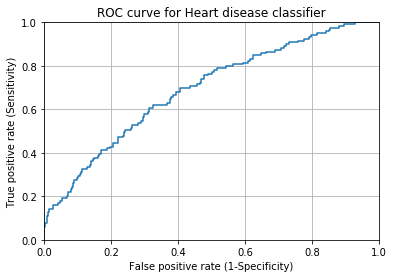

In [141]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [142]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.5286379433256103